<a href="https://colab.research.google.com/github/PatMis16/linAlgGoogleColab/blob/main/linAlg_SignalBild_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Signal-/Bildkomprimierung im jpeg mit der diskreten Kosinustransformation

## Einleitung
Datenkomprimierung findet in der digitalisierten Welt breite Anwendung. Daten werden komprimiert um den Speicherbedarf zu minimieren die Datenübertragung zu optimieren. Während einige Komprimierungsverfahren verlustfrei arbeiten, tretten bei anderen Verluste auf. Diese Verluste sind je nach Anwendung vernachlässigbar. Insbesondere bei der Speicherung von Medien wie Bildern, Videos und Musik, werden sind verlustbehaftete Komprimierungsverfahren heute Standard. Bei solchen Komprimierungsverfahren werden meist redundante Daten zusammengefasst und in einigen Fällen wird eine Reduktion des Detailierungsgrade in kauf genommen um weniger Speicherplatz zu belegen.

Vielen Komprimierungsverfahren liegt die sogennante diskrete Kosinustransformation zu Grunde. Diese wird vor allem im Bereich der Bild- und Videokompression breit angewendet. Dabei werden ausschliesslich Kosinusfunktionen unterschiedlicher Wellenzahl als Basisfunktion verwendet. [Burger. 2015. *Digitale Bildverarbeitung: eine algorithmische Einführung mit Java*](zotero://select/items/_9EUHGKD9). Sie ist dabei eine Sonderform der diskreten Fouriertransformation. Bekante Einsatzgebiete sind das JPEG Bildformat und MP3 Audiodateien, wobei bei letzterem eine etwas abgewandelte Form angewendet wird. Die diskrete Konsinustransformation kann dabei Eindimensional (für einfache Aufgaben) oder Mehrdimensional eingesetzt werden.  

## Theorieteil
Die Kosinustransformation basiert wie der Name schon sagt auf der Kosinusfunktion. Dabei werden festgelegten Stellen (Werten) in der Kosinuskurve Farbwerte zugewiesen. Der höchste Wert den die Kurve annehmen kann ist $1$ und der tiefste Wert $-1$. Diesen Werten können nun Farben zugeordnet werden. Die $1$ würde demnach dem Reinweiss entsprechen und die $-1$ einem reinen Schrwaz. Nun können Punkte auf der Kosinuskurve definiert werden, die einem bestimmten Grauton entsprechen. kann kann mann die Kosinusfunktion mit werten zwischen $0$ und $\pi$ darstellen. Nimmt man jetzt bestimmte Werte aus dieser Kurve bsp. $\frac{\pi}{6}$, $\frac{\pi}{2}$ und $\frac{5\pi}{6}$:

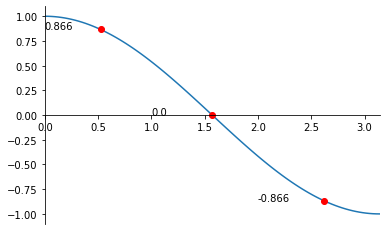

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

c_range = np.linspace(0, np.pi, 100)
y = np.cos(c_range)

values = np.array([np.cos(np.pi/6), np.cos(np.pi/2), np.cos(5*np.pi/6)])

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
plt.xlim(0, np.pi)
plt.plot(c_range, y)
plt.plot(np.pi/6, np.cos(np.pi/6), 'o', color='red')
plt.plot(np.pi/2, np.cos(np.pi/2), 'o', color='red')
plt.plot(5*np.pi/6, np.cos(5*np.pi/6), 'o', color='red')

for i, v in enumerate(values):
    ax.annotate(str(round(v, 3)), xy=(i,v), xycoords='data')

plt.show()



Können diesen Grauwerte zuegeordnet werden. Es können nun weitere Kosinusfunktionen dazu genommen werden. Hier wurden zum Beispiel die Funktionen $x\rightarrow cos(x)$, $x \rightarrow cos(1\frac{1}{2} \cdot x)$ und $x \rightarrow cos(3 \cdot x) kombiniert.

[0.52359878 1.57079633 2.61799388]
[0.866, 0.0, -0.866]
[0.7071, -0.7071, -0.7071]
[0.0, -0.0, 0.0]


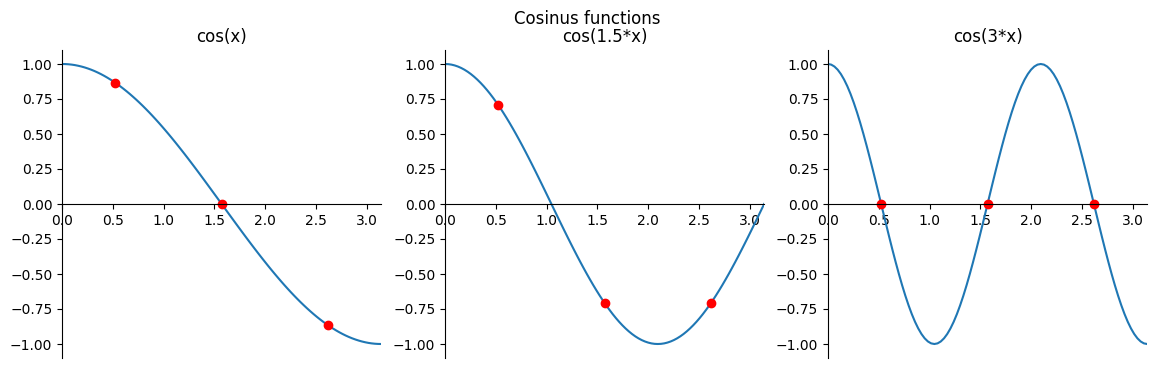

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
init_printing()

c_range = np.linspace(0, np.pi, 100)

x = sp.symbols('x')
expr_cf1 = sp.cos(x)
expr_cf2 = sp.cos(1.5 * x)
expr_cf3 = sp.cos(3 * x)

def cf1(x):
    return np.round(np.cos(x), 4)

def cf2(x):
    return np.round(np.cos(1.5*x), 4)

def cf3(x):
    return np.round(np.cos(3*x), 4)

parts = np.array([np.pi/6, np.pi/2, 5*np.pi/6])
print(parts)

cf1_values = [cf1(np.pi/6), cf1(np.pi/2), cf1(5*np.pi/6)]
print(cf1_values)
cf2_values = [cf2(np.pi/6), cf2(np.pi/2), cf2(5*np.pi/6)]
print(cf2_values)
cf3_values = [cf3(np.pi/6), cf3(np.pi/2), cf3(5*np.pi/6)]
print(cf3_values)

c_range = np.linspace(0, np.pi, 100)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14, 4))

ax0.set_title(expr_cf1)
ax0.spines['top'].set_color('none')
ax0.spines['left'].set_position('zero')
ax0.spines['right'].set_color('none')
ax0.spines['bottom'].set_position('zero')
ax0.plot(c_range, cf1(c_range))
ax0.plot(parts, cf1(parts), 'o', color='red')

ax1.set_title(expr_cf2)
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.plot(c_range, cf2(c_range))
ax1.plot(parts, cf2(parts), 'o', color='red')

ax2.set_title(expr_cf3)
ax2.spines['top'].set_color('none')
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['bottom'].set_position('zero')
ax2.plot(c_range, cf3(c_range))
ax2.plot(parts, cf3(parts), 'o', color='red')

fig.suptitle("Cosinus functions")
plt.xlim(0, np.pi)
plt.show()


Jede Kosinusfunktion liefert so 3 Werte, die als Vektor interpretiert werden können, deren Werte verschiedene Graustrufen zugeordnet sind.

Nun kann eine beliebige kombination von Grau-Werten über die linearkombination der zuvor definierten Kosinusfunktionen dargestellt werden. 

Die Transformation kann mittels einer Transformationsmatrix dargestellt werden. Die Darstellung ist die Matrix bzw. bei der eindimensionalen Kosinustransformation der Vektor welcher für die Transformation.




## Praxisteil

In diesem Praxisteil soll zum einen eine Python-Funktion zur eindimensionalen Kosinustransformation implementiert werden, welche die Transformations-Matrix erzeugt und auch eine entsprechende Rücktransformation ermöglicht.

### Eindimensionale Kosinustransformation

Bei der eindimensionalen Kosinustransformation wird nur ein Kanal transformiert, was bedeutet, dass als Eingabe ein Signalvektor verwendet wird. Der Signalvektor besteht aus einer Anzahl an Grauwerten zwischen 0 und 255. 
Die folgende implementation is angelehnt an [Burger. 2015. *Digitale Bildverarbeitung: eine algorithmische Einführung mit Java*](zotero://select/items/_9EUHGKD9).

[244.49999999999997, 158.5119643194436, -0.5000000000000053, 31.216296506655574]
[[244.5       ]
 [158.51196432]
 [ -0.5       ]
 [ 31.21629651]]
[233.99999999999997, 145.00000000000003, 99.99999999999999, 9.999999999999993]
[[234.]
 [145.]
 [100.]
 [ 10.]]


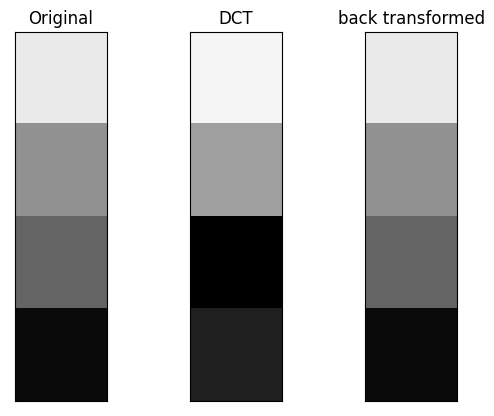

In [95]:
# Eindimensionale Kosinustransformation
import numpy as np
import matplotlib.pyplot as plt

def genBWImage(imgSize):
  image = np.zeros([imgSize, imgSize], dtype=int)
  idx1 = int(imgSize/4)
  idx2 = int(idx1 + (imgSize/2))

  image[idx1:idx2, idx1:idx2] = np.ones([int(imgSize/2), int(imgSize/2)], dtype=int)*255
  return image

def  DCT(g) :
  M = len(g)
  s = np.sqrt(2.0 / M)
  G = [0.0] * (M)
  m = 0
  while (m < M) :
    cm = 1.0
    if (m == 0) :
      cm = 1.0 / np.sqrt(2)
    sum = 0
    u = 0
    while (u < M):
      Phi = np.pi * m * (2 * u + 1) / (2 * M)
      sum += g[u] * cm * np.cos(Phi)
      u += 1
    G[m] = s * sum
    m += 1
  return G


def  iDCT(G) :
  # inverse DCT on spectrum G
  M = len(G)
  s = np.sqrt(2.0 / M)
  # common scale factor
  g = [0.0] * (M)
  u = 0
  while (u < M) :
    sum = 0
    m = 0
    while (m < M) :
      cm = 1.0
      if (m == 0) :
        cm = 1.0 / np.sqrt(2)
      Phi = np.pi * m * (2 * u + 1) / (2 * M)
      sum += G[m] * cm * np.cos(Phi)
      m += 1
    g[u] = s * sum
    u += 1
  return g

def imageMap(a):
  image = np.empty((len(a),1), dtype=float)
  for i in range(len(a)):
    image[i-1] = np.array([a[i-1]])
  return image
  

def main():
  rows = 1
  cols = 3
  fig= plt.figure()
  
  baseImage = np.array([234,145,100, 10])
  
  ax1 = fig.add_subplot(rows, cols, 1)
  plt.imshow(imageMap(baseImage), cmap='gray', vmin=0, vmax=255)
  ax1.title.set_text("Original")
  ax1.get_xaxis().set_visible(False)
  ax1.get_yaxis().set_visible(False)
  transform = DCT(baseImage)
  print(transform)
  
  image = imageMap(transform)
      
  print(image)
  ax2 = fig.add_subplot(rows, cols, 2)
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)
  ax2.title.set_text("DCT")
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)


  retransform = iDCT(transform)
  print(retransform)
  
  image2 = imageMap(retransform)
  print(image2)
  ax3 = fig.add_subplot(rows, cols, 3, )
  plt.imshow(image2, cmap='gray', vmin=0, vmax=255)
  ax3.title.set_text("back transformed")
  ax3.get_xaxis().set_visible(False)
  ax3.get_yaxis().set_visible(False)

if __name__ == '__main__':
    main()


Das Beispiel transformiert ein Signal-Vektor `baseImage` mit der diskreten Kosinustransformation. Wie die Abbildung zeigt, weicht die Transformation DCT von dem Original in den dunklen Bereichen ab. Die Rücktransformation enspricht wieder weitgehend dem Original.

### Verwendung von Scipy `scipy.fftpack.dct`

SciPy stellt im Paket `fftpack` die funkgion `dct` zu diskreten Kosinustransformation zur Verfügung (siehe https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html). Damit lassen sich Kosinustransformationen mit einem einfachen Aufruf durchführen. Um dies zu demonstrieren, wurden ein Foto, eine komplexe Grafik (Comic-Bild) sowie ein Linienbild mit der Funktion `dct` transformiert. 

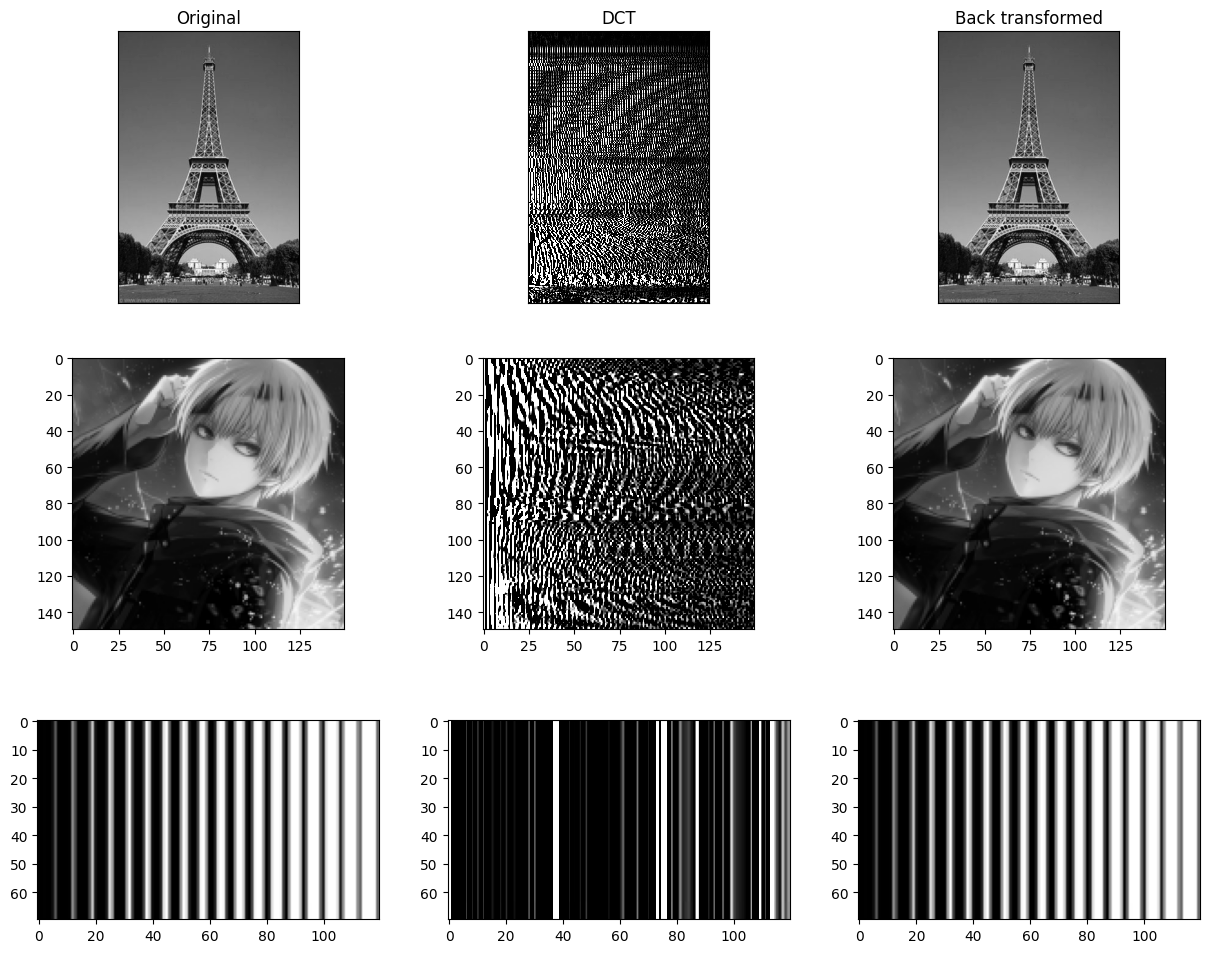

In [152]:
# Verwendung der dct funktion aus scipy.fftpack

from scipy.fftpack import dct, idct, dctn
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt

cols = 3
rows = 3
fig= plt.figure(figsize=[15, 12])

def save_image_from_array(aimg, path='myimage.png'):
    img = Image.fromarray(aimg, 'L')
    img.save(path)
    print("Saved image: {}".format(path))


foto_img = Image.open('eiffel_tower.jpg').convert('L')
foto_img_arr = np.asarray(foto_img)
ax1 = fig.add_subplot(rows, cols, 1) 
ax1.title.set_text("Original")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.imshow(foto_img_arr, cmap='gray', vmin=0, vmax=255)

foto_dct_img = dct(foto_img_arr, type=1 ,norm=None)
ax2 = fig.add_subplot(rows, cols, 2)
ax2.title.set_text("DCT")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.imshow(foto_dct_img, cmap='gray', vmin=0, vmax=255)

foto_backtransform = idct(foto_dct_img, type=1, norm='forward')
ax3 = fig.add_subplot(rows, cols, 3)
ax3.title.set_text("Back transformed")
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
plt.imshow(foto_backtransform, cmap='gray', vmin=0, vmax=255)


comic_img = Image.open('avatar.png').convert('L')
comic_img_arr = np.asarray(comic_img)
fig.add_subplot(rows, cols, 4)
plt.imshow(comic_img_arr, cmap='gray', vmin=0, vmax=255)

comic_dct_img = dct(comic_img_arr, 1, norm=None)
fig.add_subplot(rows, cols, 5)
plt.imshow(comic_dct_img, cmap='gray', vmin=0, vmax=255)

comic_backtransform = idct(comic_dct_img, type=1, norm='forward')
fig.add_subplot(rows, cols, 6)
plt.imshow(comic_backtransform, cmap='gray', vmin=0, vmax=255)


line_img = Image.open('vert_lines.jpg').convert('L')
line_img_arr = np.asarray(line_img)
fig.add_subplot(rows, cols, 7)
plt.imshow(line_img_arr, cmap='gray', vmin=0, vmax=255)

dct_line_img = dct(line_img_arr, type=1, norm=None)
ax5 = fig.add_subplot(rows, cols, 8)
plt.imshow(dct_line_img, cmap='gray', vmin=0, vmax=255)

line_backtransform = idct(dct_line_img, type=1, norm='forward')
fig.add_subplot(rows, cols, 9)
plt.imshow(line_backtransform, cmap='gray', vmin=0, vmax=255)


Neben jedem Bild wird das entsprechende DCT-Repräsentation des Bildes dargestellt. In der dritten Spalte wird das zurück-transformierte Bild angezeigt. Wichtig ist, dass hier der Parameter `norm='forward'` verwendet wird, da ansonsten die rücktransformation nicht funktioniert.

## Schlussfolgerungen


## Quellenverzeichnis
[Burger. 2015. *Digitale Bildverarbeitung: eine algorithmische Einführung mit Java*](zotero://select/items/_9EUHGKD9)


